In [16]:
import cv2
import numpy as np
from skimage import data
from skimage.io import imread
from google.colab import files

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image = files.upload()

Saving le_minerale.jpg to le_minerale.jpg


(1000, 1000, 3)


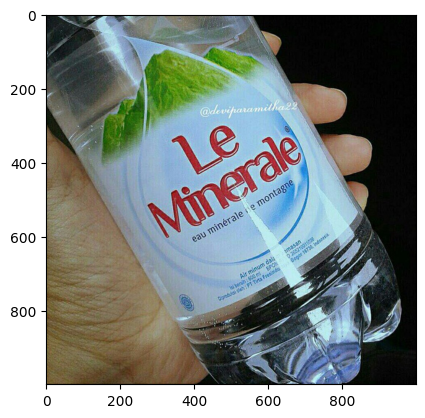

In [17]:
image = imread(fname="le_minerale.jpg")

print(image.shape)
plt.imshow(image)

Proses Morfologi Closing

In [18]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# defining the range of masking
blue1 = np.array([110, 50, 50])
blue2 = np.array([130, 255, 255])

# initializing the mask to be
# convoluted over input image
mask = cv2.inRange(hsv, blue1, blue2)

# passing the bitwise_and over
# each pixel convoluted
res = cv2.bitwise_and(image, image, mask = mask)

# defining the kernel i.e. Structuring element
kernel = np.ones((5, 5), np.uint8)

# defining the closing function
# over the image and structuring element
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

Plot Citra Output

Text(0.5, 1.0, 'Citra Input 2')

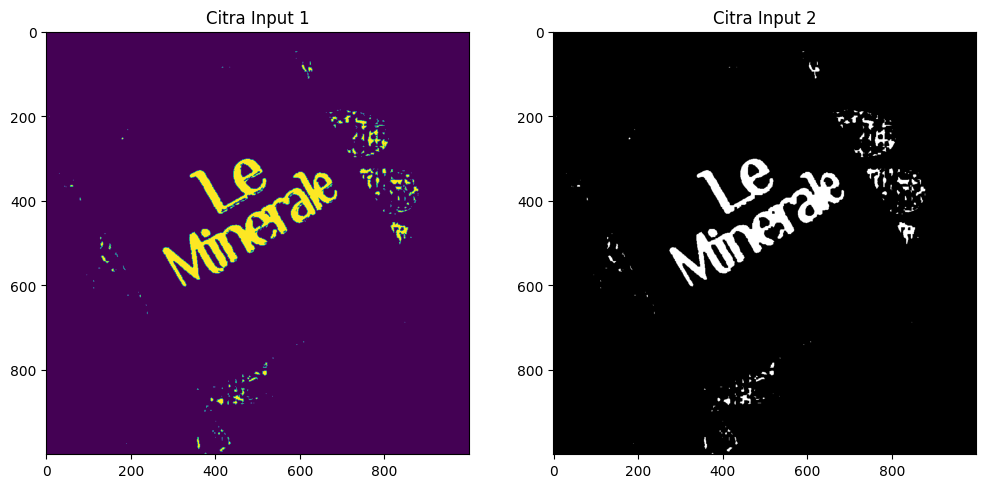

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(mask)
ax[0].set_title("Citra Input 1")

ax[1].imshow(closing, cmap='gray')
ax[1].set_title('Citra Input 2')

Penerapan Operasi Morfologi Closing dengan Webcam

In [21]:
from IPython.display import display, Javascript
from google.colab.output import eval_js

def start_camera():
    js = Javascript('''
        async function startCamera() {
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            const video = document.createElement('video');
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Capture and send frames continuously.
            const sendFrame = () => {
                const canvas = document.createElement('canvas');
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
                canvas.getContext('2d').drawImage(video, 0, 0);
                const imgData = canvas.toDataURL('image/jpeg', 1.0);

                // Send the frame to Python for processing.
                google.colab.kernel.invokeFunction('notebook.python_callback', [imgData], {});
                requestAnimationFrame(sendFrame);
            };

            requestAnimationFrame(sendFrame);
        }
        ''')
    display(js)

# Fungsi ini akan dipanggil oleh JavaScript untuk mengirimkan frame gambar ke Python.
def python_callback(imgData):
    # Lakukan pemrosesan gambar di sini
    print('Menerima frame gambar:', imgData[:50])

# Panggil fungsi untuk memulai kamera
start_camera()

<IPython.core.display.Javascript object>

In [25]:
import cv2
import numpy as np

# return video from the first webcam on your computer.
screenRead = cv2.VideoCapture(1)

# loop runs if capturing has been initialized.
while True:
    # reads frames from a camera
    ret, image = screenRead.read()

    # Check if the frame was successfully read
    if not ret:
        print("Failed to capture frame from webcam.")
        break

    # Converts to HSV color space, OCV reads colors as BGR
    # frame is converted to hsv
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # defining the range of masking
    blue1 = np.array([110, 50, 50])
    blue2 = np.array([130, 255, 255])

    # initializing the mask to be
    # convoluted over input image
    mask = cv2.inRange(hsv, blue1, blue2)

    # passing the bitwise_and over
    # each pixel convoluted
    res = cv2.bitwise_and(image, image, mask=mask)

    # defining the kernel i.e. Structuring element
    kernel = np.ones((5, 5), np.uint8)

    # defining the closing function
    # over the image and structuring element
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # The mask and closing operation
    # is shown in the window
    cv2.imshow('Mask', mask)
    cv2.imshow('Closing', closing)

    # Wait for 'a' key to stop the program
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break

# De-allocate any associated memory usage
cv2.destroyAllWindows()

# Close the window / Release webcam
screenRead.release()

Failed to capture frame from webcam.


In [29]:
import cv2
import numpy as np

# return video from the first webcam on your computer.
screenRead = cv2.VideoCapture(0)

# loop runs if capturing has been initialized.
while(1):
    # reads frames from a camera
    _, image = screenRead.read()

    # Converts to HSV color space, OCV reads colors as BGR
    # frame is converted to hsv
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # defining the range of masking
    blue1 = np.array([110, 50, 50])
    blue2 = np.array([130, 255, 255])

    # initializing the mask to be
    # convoluted over input image
    mask = cv2.inRange(hsv, blue1, blue2)

    # passing the bitwise_and over
    # each pixel convoluted
    res = cv2.bitwise_and(image, image, mask = mask)

    # defining the kernel i.e. Structuring element
    kernel = np.ones((5, 5), np.uint8)

    # defining the closing function
    # over the image and structuring element
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # The mask and closing operation
    # is shown in the window
    cv2.imshow('Mask', mask)
    cv2.imshow('Closing', closing)

    # Wait for 'a' key to stop the program
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break

# De-allocate any associated memory usage
cv2.destroyAllWindows()

# Close the window / Release webcam
screenRead.release()

error: ignored